In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import av_err, savetocsv, allthewayup
from scipy.optimize import 

In [10]:
data = pd.read_csv("Data/LYSO/Na22/LYSO_Na22_final.csv", 
                   nrows = 5000
                  )

Text(0.5, 1.0, 'Counts Recorded per Channel')

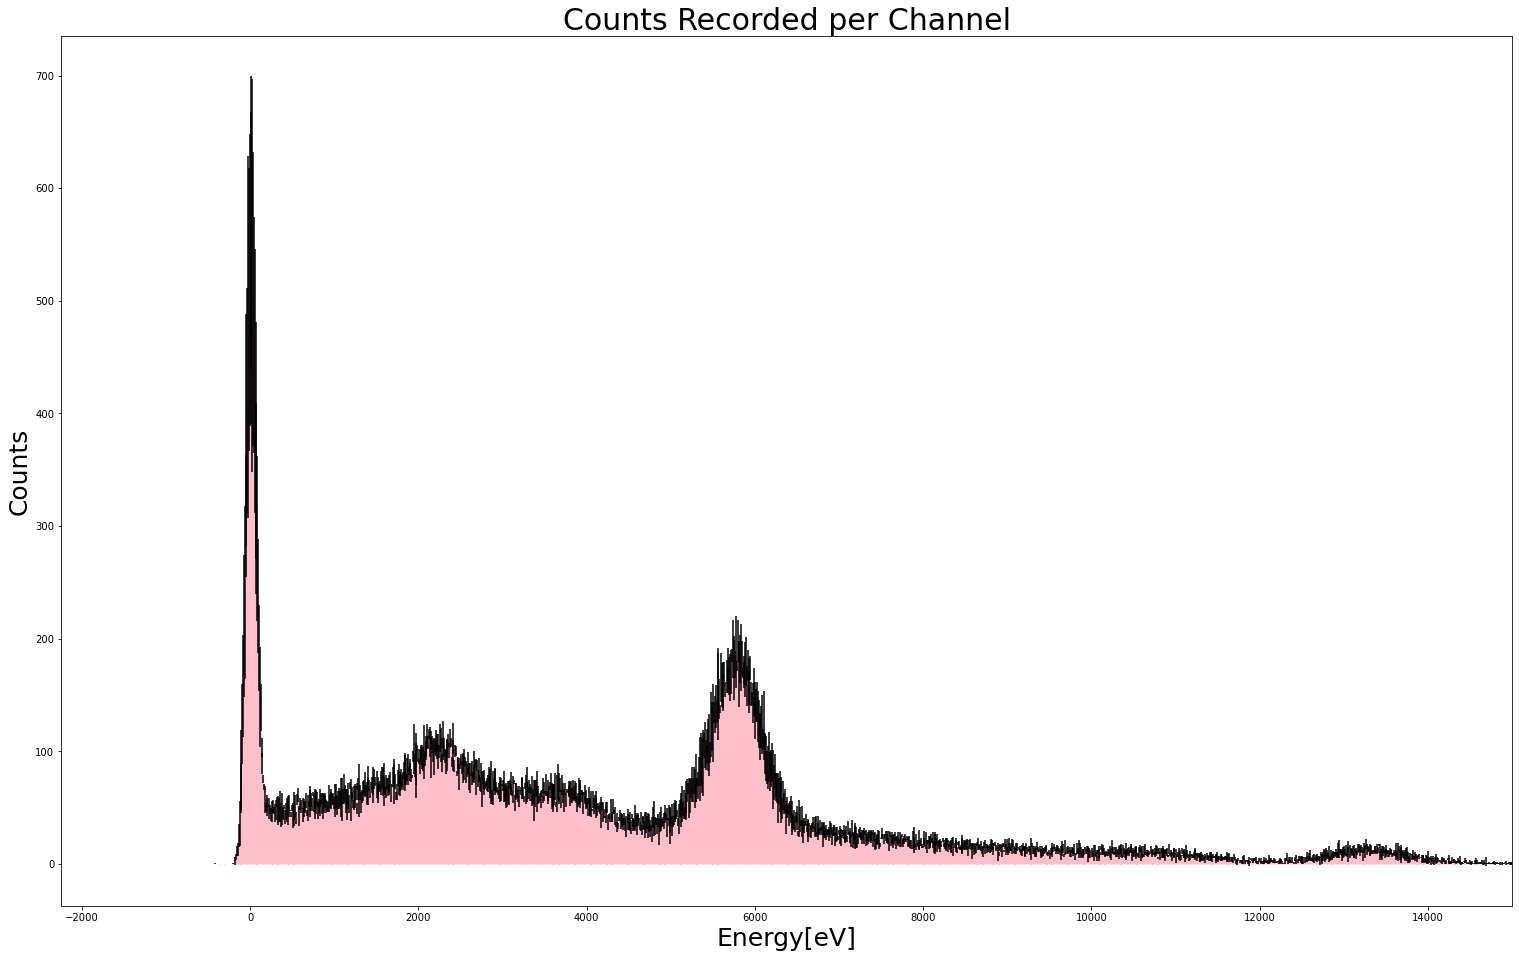

In [11]:
fig, ax = plt.subplots(figsize = (26,16))

# barplotting because it feels better than a histogram
ax.bar(x = data['ADC channel'], height = data['average'], width = 0.8, ec = 'pink', yerr = data['error'])
ax.set_xlim(xmax = 15000)

plt.xlabel('Energy[eV]', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)

In [4]:
# in this one we wish to plot the ADC channel and energy levels for peaks of each source to find a converion ratio

B_Am241 = pd.read_csv('Data/BGO/Am241/BGO_Am241_final.csv')
B_Ba133 = pd.read_csv('Data/BGO/Ba133/BGO_Ba133_final.csv')
B_Co60 = pd.read_csv('Data/BGO/Co60/BGO_C060_final.csv')
B_Cs137 = pd.read_csv('Data/BGO/Cs137/BGO_Cs137_final.csv')
B_Na22 = pd.read_csv('Data/BGO/Na22/BGO_Na22_final.csv')

C_Am241 = pd.read_csv('Data/CSI/Am241/CSI_Am241_final.csv')
C_Ba133 = pd.read_csv('Data/CSI/Ba133/CSI_Ba133_final.csv')
C_Co60 = pd.read_csv('Data/CSI/Co60/CSI_Co60_final.csv')
C_Cs137 = pd.read_csv('Data/CSI/Cs137/CSI_Cs137_final.csv')
C_Na22 = pd.read_csv('Data/CSI/Na22/CSI_Na22_final.csv')

L_Am241 = pd.read_csv('Data/LYSO/Am241/LYSO_Am241_final.csv')
L_Ba133 = pd.read_csv('Data/LYSO/Ba133/LYSO_Ba133_final.csv')
L_Co60 = pd.read_csv('Data/LYSO/Co60/LYSO_Co60_final.csv')
L_Cs137 = pd.read_csv('Data/LYSO/Cs137/LYSO_Cs137_final.csv')
L_Na22 = pd.read_csv('Data/LYSO/Na22/LYSO_Na22_final.csv')

In [31]:


L_Am = allthewayup(L_Am241, 59.54*10**3, 17.7*10**3, 1)
L_Ba = allthewayup(L_Ba133, 31*10**3, 79*10**3, 0, 500)
L_Co = allthewayup(L_Co60, 1173.2*10**3, 1332.5*10**3, 0, 2000, 1)
L_Cs = allthewayup(L_Cs137, 32*10**3, 661.7*10**3,0, 4000)
L_Na = allthewayup(L_Na22, 511*10**3, 1274.5*10**3, 0, 4000)
L_plot_x = [L_Am['peak1']['energy'], L_Am['peak2']['energy'],
           L_Ba['peak1']['energy'], L_Ba['peak2']['energy'],
            L_Co['peak1']['energy'], L_Co['peak2']['energy'],
            L_Cs['peak1']['energy'], L_Cs['peak2']['energy'],
            L_Na['peak1']['energy'], L_Na['peak2']['energy']
           ]
L_plot_y = [L_Am['peak1']['channel'], L_Am['peak2']['channel'],
           L_Ba['peak1']['channel'], L_Ba['peak2']['channel'],
            L_Co['peak1']['channel'], L_Co['peak2']['channel'],
            L_Cs['peak1']['channel'], L_Cs['peak2']['channel'],
            L_Na['peak1']['channel'], L_Na['peak2']['channel']
           ]

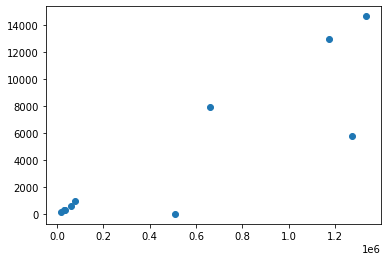

In [33]:
plt.scatter(L_plot_x, L_plot_y)

In [30]:
L_plot_x

[59540.0,
 17700.0,
 31000,
 79000,
 1173200.0,
 1332500.0,
 32000,
 661700.0,
 511000,
 1274500.0]